# Introduction to Regression with Neural Networks in Tensorflow

There  are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a  number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

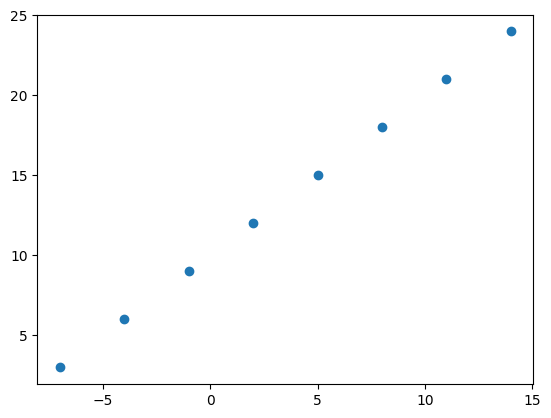

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a  demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].ndim

0

In [16]:
# turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

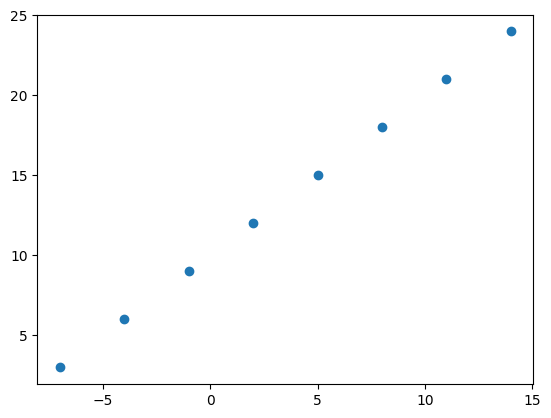

In [18]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learnign model.
2. **Compiling a  model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=150)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - loss: 18.3328 - mae: 18.3328
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 18.0516 - mae: 18.0516
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 17.7703 - mae: 17.7703
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 17.4891 - mae: 17.4891
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 17.2078 - mae: 17.2078
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 16.9266 - mae: 16.9266
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 16.6453 - mae: 16.6453
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 16.3641 - mae: 16.3641
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 16.0828 - mae: 16.0828
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 15.8016 - mae: 15.8016
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 15.5203 - mae: 15.5203
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.2391 - mae: 15.2391
Epoch 13/150
1/1 ━━━━━━━

In [26]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [31]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[29.90226]], dtype=float32)